# Example notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pertpy
from deres import DEResult
import scanpy as sc
import numpy as np
import pandas as pd

/home/sturm/projects/scverse/deres/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Build example dataset

For the sake of this example, we just go with the `pbmc3k` dataset and assign a random sample identifier to
each cell to mimick a multi-sample dataset. 

In [3]:
adata = sc.datasets.pbmc3k_processed()
adata.obs["sample"] = pd.Categorical([f"sample_{x}" for x in np.random.randint(0, 10, adata.shape[0])])
# raw.X contains log-normalized values which we are going to use here
adata = sc.AnnData(adata.raw.X, obs=adata.obs, var=adata.raw.var)

## Run differential expression testing

We first contruct a pseudobulk-object and then use the statsmodels implementation in pertpy to 
compare gene expression between cell-types. For the sake of the example, we
compare CD8+ T cells with CD4+ T cells and NK cells. 

In [4]:
pb = sc.get.aggregate(adata, ["sample", "louvain"], "mean")

In [5]:
mod = pertpy.tl.Statsmodels(pb, design="~ louvain", layer="mean")
mod.fit()

  0%|                                                                                                                                                                                                                           | 0/13714 [00:00<?, ?it/s]

  1%|█▊                                                                                                                                                                                                             | 123/13714 [00:00<00:11, 1225.07it/s]

  2%|███▋                                                                                                                                                                                                           | 246/13714 [00:00<00:11, 1155.27it/s]

  3%|█████▋                                                                                                                                                                                                         | 377/13714 [00:00<00:10, 1221.57it/s]

  4%|███████▋                                                                                                                                                                                                       | 508/13714 [00:00<00:10, 1252.19it/s]

  5%|█████████▌                                                                                                                                                                                                     | 637/13714 [00:00<00:10, 1265.42it/s]

  6%|███████████▌                                                                                                                                                                                                   | 764/13714 [00:00<00:10, 1245.25it/s]

  7%|█████████████▌                                                                                                                                                                                                 | 896/13714 [00:00<00:10, 1267.12it/s]

  7%|███████████████▍                                                                                                                                                                                              | 1028/13714 [00:00<00:09, 1280.97it/s]

  8%|█████████████████▍                                                                                                                                                                                            | 1159/13714 [00:00<00:09, 1287.10it/s]

  9%|███████████████████▍                                                                                                                                                                                          | 1291/13714 [00:01<00:09, 1296.18it/s]

 10%|█████████████████████▍                                                                                                                                                                                        | 1423/13714 [00:01<00:09, 1300.74it/s]

 11%|███████████████████████▎                                                                                                                                                                                      | 1554/13714 [00:01<00:09, 1303.11it/s]

 12%|█████████████████████████▎                                                                                                                                                                                    | 1685/13714 [00:01<00:09, 1302.08it/s]

 13%|███████████████████████████▎                                                                                                                                                                                  | 1816/13714 [00:01<00:09, 1302.03it/s]

 14%|█████████████████████████████▏                                                                                                                                                                                | 1947/13714 [00:01<00:09, 1297.63it/s]

 15%|███████████████████████████████▏                                                                                                                                                                              | 2077/13714 [00:01<00:09, 1291.28it/s]

 16%|█████████████████████████████████▏                                                                                                                                                                            | 2207/13714 [00:01<00:08, 1291.86it/s]

 17%|███████████████████████████████████                                                                                                                                                                           | 2337/13714 [00:01<00:08, 1286.42it/s]

 18%|█████████████████████████████████████                                                                                                                                                                         | 2467/13714 [00:01<00:08, 1289.85it/s]

 19%|██████████████████████████████████████▉                                                                                                                                                                       | 2596/13714 [00:02<00:09, 1231.16it/s]

 20%|████████████████████████████████████████▊                                                                                                                                                                     | 2720/13714 [00:02<00:09, 1193.21it/s]

 21%|██████████████████████████████████████████▋                                                                                                                                                                   | 2840/13714 [00:02<00:09, 1177.92it/s]

 22%|████████████████████████████████████████████▌                                                                                                                                                                 | 2970/13714 [00:02<00:08, 1212.77it/s]

 23%|██████████████████████████████████████████████▌                                                                                                                                                               | 3096/13714 [00:02<00:08, 1225.98it/s]

 24%|████████████████████████████████████████████████▍                                                                                                                                                             | 3226/13714 [00:02<00:08, 1244.90it/s]

 24%|██████████████████████████████████████████████████▍                                                                                                                                                           | 3356/13714 [00:02<00:08, 1260.99it/s]

 25%|████████████████████████████████████████████████████▎                                                                                                                                                         | 3486/13714 [00:02<00:08, 1272.33it/s]

 26%|██████████████████████████████████████████████████████▎                                                                                                                                                       | 3616/13714 [00:02<00:07, 1277.63it/s]

 27%|████████████████████████████████████████████████████████▎                                                                                                                                                     | 3746/13714 [00:02<00:07, 1283.14it/s]

 28%|██████████████████████████████████████████████████████████▏                                                                                                                                                   | 3876/13714 [00:03<00:07, 1287.71it/s]

 29%|████████████████████████████████████████████████████████████▏                                                                                                                                                 | 4005/13714 [00:03<00:07, 1286.09it/s]

 30%|██████████████████████████████████████████████████████████████                                                                                                                                                | 4135/13714 [00:03<00:07, 1287.68it/s]

 31%|████████████████████████████████████████████████████████████████                                                                                                                                              | 4266/13714 [00:03<00:07, 1292.18it/s]

 32%|██████████████████████████████████████████████████████████████████                                                                                                                                            | 4397/13714 [00:03<00:07, 1294.86it/s]

 33%|████████████████████████████████████████████████████████████████████▎                                                                                                                                          | 4527/13714 [00:03<00:10, 844.10it/s]

 34%|██████████████████████████████████████████████████████████████████████▎                                                                                                                                        | 4656/13714 [00:03<00:09, 940.98it/s]

 35%|███████████████████████████████████████████████████████████████████████▉                                                                                                                                      | 4786/13714 [00:03<00:08, 1024.48it/s]

 36%|█████████████████████████████████████████████████████████████████████████▊                                                                                                                                    | 4915/13714 [00:04<00:08, 1091.27it/s]

 37%|███████████████████████████████████████████████████████████████████████████▊                                                                                                                                  | 5046/13714 [00:04<00:07, 1147.03it/s]

 38%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                                                | 5175/13714 [00:04<00:07, 1185.75it/s]

 39%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                                              | 5304/13714 [00:04<00:06, 1214.85it/s]

 40%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                                                            | 5433/13714 [00:04<00:06, 1234.60it/s]

 41%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                                                          | 5563/13714 [00:04<00:06, 1251.06it/s]

 42%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                        | 5693/13714 [00:04<00:06, 1263.73it/s]

 42%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                      | 5822/13714 [00:04<00:06, 1263.20it/s]

 43%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                    | 5952/13714 [00:04<00:06, 1272.74it/s]

 44%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                  | 6082/13714 [00:04<00:05, 1280.02it/s]

 45%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                | 6212/13714 [00:05<00:05, 1283.83it/s]

 46%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                              | 6341/13714 [00:05<00:05, 1284.33it/s]

 47%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                            | 6471/13714 [00:05<00:05, 1287.09it/s]

 48%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                          | 6600/13714 [00:05<00:05, 1280.18it/s]

 49%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                         | 6730/13714 [00:05<00:05, 1284.50it/s]

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                       | 6859/13714 [00:05<00:05, 1284.11it/s]

 51%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                     | 6988/13714 [00:05<00:05, 1275.93it/s]

 52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                   | 7116/13714 [00:05<00:05, 1269.89it/s]

 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                 | 7246/13714 [00:05<00:05, 1277.65it/s]

 54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 7376/13714 [00:05<00:04, 1281.47it/s]

 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 7505/13714 [00:06<00:04, 1283.80it/s]

 56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 7634/13714 [00:06<00:04, 1285.28it/s]

 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 7764/13714 [00:06<00:04, 1288.48it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 7893/13714 [00:06<00:04, 1272.96it/s]

 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                     | 8021/13714 [00:06<00:04, 1267.78it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 8151/13714 [00:06<00:04, 1275.86it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 8280/13714 [00:06<00:04, 1279.99it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 8410/13714 [00:06<00:04, 1285.82it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 8540/13714 [00:06<00:04, 1287.71it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 8669/13714 [00:06<00:03, 1283.99it/s]

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 8798/13714 [00:07<00:03, 1249.47it/s]

 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 8924/13714 [00:07<00:03, 1211.30it/s]

 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 9046/13714 [00:07<00:03, 1183.86it/s]

 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 9165/13714 [00:07<00:03, 1172.86it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 9283/13714 [00:07<00:03, 1152.02it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 9399/13714 [00:07<00:03, 1140.29it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 9514/13714 [00:07<00:03, 1131.88it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 9642/13714 [00:07<00:03, 1173.42it/s]

 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 9760/13714 [00:07<00:03, 1149.59it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 9880/13714 [00:08<00:03, 1161.97it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 10013/13714 [00:08<00:03, 1210.89it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 10146/13714 [00:08<00:02, 1244.57it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 10280/13714 [00:08<00:02, 1271.94it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 10413/13714 [00:08<00:02, 1289.12it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 10546/13714 [00:08<00:02, 1300.35it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 10677/13714 [00:08<00:02, 1238.64it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 10802/13714 [00:08<00:02, 1192.66it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 10922/13714 [00:08<00:02, 1162.92it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 11039/13714 [00:08<00:02, 1142.17it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 11169/13714 [00:09<00:02, 1184.91it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 11302/13714 [00:09<00:01, 1225.05it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 11435/13714 [00:09<00:01, 1255.59it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 11568/13714 [00:09<00:01, 1275.87it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 11701/13714 [00:09<00:01, 1291.11it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 11835/13714 [00:09<00:01, 1302.64it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 11969/13714 [00:09<00:01, 1311.08it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 12101/13714 [00:09<00:01, 1308.04it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 12234/13714 [00:09<00:01, 1312.44it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 12366/13714 [00:10<00:01, 789.51it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 12476/13714 [00:10<00:01, 851.83it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 12585/13714 [00:10<00:01, 903.41it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 12711/13714 [00:10<00:01, 988.81it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 12824/13714 [00:10<00:00, 1012.72it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 12935/13714 [00:10<00:00, 1031.28it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 13046/13714 [00:10<00:00, 1045.83it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 13156/13714 [00:10<00:00, 1054.35it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 13265/13714 [00:11<00:00, 1061.78it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 13386/13714 [00:11<00:00, 1103.48it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 13516/13714 [00:11<00:00, 1159.77it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 13645/13714 [00:11<00:00, 1197.25it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13714/13714 [00:11<00:00, 1204.53it/s]

In [6]:
res = mod.test_contrasts(
    {
        "CD8_vs_CD4": mod.cond(louvain="CD8 T cells") - mod.cond(louvain="CD4 T cells"),
        "CD8_vs_NK": mod.cond(louvain="CD8 T cells") - mod.cond(louvain="NK cells"),
    }
)
res["p_value"] = res["p_value"].astype(float)  # don't ask me why this is an object column

  0%|                                                                                                                                                                                                                           | 0/13714 [00:00<?, ?it/s]

  8%|████████████████▊                                                                                                                                                                                            | 1125/13714 [00:00<00:01, 11248.99it/s]

 17%|███████████████████████████████████▏                                                                                                                                                                         | 2358/13714 [00:00<00:00, 11883.31it/s]

 26%|█████████████████████████████████████████████████████▍                                                                                                                                                       | 3577/13714 [00:00<00:00, 12019.17it/s]

 35%|███████████████████████████████████████████████████████████████████████▋                                                                                                                                     | 4795/13714 [00:00<00:00, 12082.23it/s]

 44%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                   | 6004/13714 [00:00<00:00, 11830.12it/s]

 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                 | 7230/13714 [00:00<00:00, 11973.74it/s]

 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 8454/13714 [00:00<00:00, 12058.41it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 9691/13714 [00:00<00:00, 12154.15it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 10945/13714 [00:00<00:00, 12274.04it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 12194/13714 [00:01<00:00, 12338.86it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 13430/13714 [00:01<00:00, 12343.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13714/13714 [00:01<00:00, 12133.73it/s]

  0%|                                                                                                                                                                                                                           | 0/13714 [00:00<?, ?it/s]

  9%|███████████████████▍                                                                                                                                                                                         | 1302/13714 [00:00<00:00, 13017.81it/s]

 20%|████████████████████████████████████████▏                                                                                                                                                                    | 2689/13714 [00:00<00:00, 13516.00it/s]

 29%|████████████████████████████████████████████████████████████▍                                                                                                                                                | 4041/13714 [00:00<00:00, 13374.32it/s]

 40%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                                           | 5449/13714 [00:00<00:00, 13647.20it/s]

 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                       | 6814/13714 [00:00<00:00, 13592.63it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 8202/13714 [00:00<00:00, 13689.10it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 9605/13714 [00:00<00:00, 13798.90it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 11011/13714 [00:00<00:00, 13879.69it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 12400/13714 [00:00<00:00, 13877.71it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13714/13714 [00:00<00:00, 13739.99it/s]

In [7]:
res

,variable,p_value,t_value,sd,log_fc,adj_p_value,contrast
3694,GZMK,2.673341e-28,1.809235e+01,0.040185,7.270405e-01,2.673341e-28,CD8_vs_CD4
13001,NKG7,3.466050e-28,1.801217e+01,0.098068,1.766409e+00,3.466050e-28,CD8_vs_CD4
3695,GZMA,3.856414e-28,1.797929e+01,0.046597,8.377783e-01,3.856414e-28,CD8_vs_CD4
11083,CCL5,1.199674e-26,1.694045e+01,0.106722,1.807919e+00,1.199674e-26,CD8_vs_CD4
11879,CST7,2.002654e-25,1.611773e+01,0.054267,8.746589e-01,2.002654e-25,CD8_vs_CD4
...,...,...,...,...,...,...,...
9820,MYO5C,1.000000e+00,0.000000e+00,0.001101,0.000000e+00,1.000000e+00,CD8_vs_NK
1463,RP11-214N9.1,1.000000e+00,0.000000e+00,0.002298,0.000000e+00,1.000000e+00,CD8_vs_NK
9829,DYX1C1,1.000000e+00,0.000000e+00,0.000841,0.000000e+00,1.000000e+00,CD8_vs_NK
2663,HESX1,1.000000e+00,4.599410e-17,0.011786,5.421011e-19,1.000000e+00,CD8_vs_NK


## Construct DEResult class

DEResult is class that holds a dataframe with DE results and associated metadata (e.g. which columns to use).
The DEResult instance then provides summary and plotting functions to investigate the differential expression results.

In [8]:
de_res = DEResult(
    res, pb, p_col="p_value", effect_size_col="log_fc", var_col="variable", contrast_col="contrast", layer="mean"
)

In [9]:
de_res.summary()

,total,up,down,contrast
p < 0.1,1036,415,621,CD8_vs_CD4
p < 0.05,760,278,482,CD8_vs_CD4
p < 0.01,451,132,319,CD8_vs_CD4
p < 0.001,295,73,222,CD8_vs_CD4
p < 0.0001,158,48,110,CD8_vs_CD4
p < 0.1,1819,880,939,CD8_vs_NK
p < 0.05,1165,572,593,CD8_vs_NK
p < 0.01,667,340,327,CD8_vs_NK
p < 0.001,351,176,175,CD8_vs_NK
p < 0.0001,220,98,122,CD8_vs_NK


We can use `.p_adjust` to apply FDR correction of the p-values. It adds another column with the adjusted p-values
to the results data frame and updates the pointer of the p-value column to use to use the FDR-adjusted p-values. 

As a result, we can see in the summary DF, that now a lot fewer genes are considered significant at the different 
thresholds. 

In [10]:
de_res.p_adjust()

In [11]:
de_res.summary()

,total,up,down,contrast
p < 0.1,341,93,248,CD8_vs_CD4
p < 0.05,301,76,225,CD8_vs_CD4
p < 0.01,163,49,114,CD8_vs_CD4
p < 0.001,117,35,82,CD8_vs_CD4
p < 0.0001,62,27,35,CD8_vs_CD4
p < 0.1,441,222,219,CD8_vs_NK
p < 0.05,370,185,185,CD8_vs_NK
p < 0.01,239,109,130,CD8_vs_NK
p < 0.001,146,60,86,CD8_vs_NK
p < 0.0001,95,32,63,CD8_vs_NK


## Use plotting functions

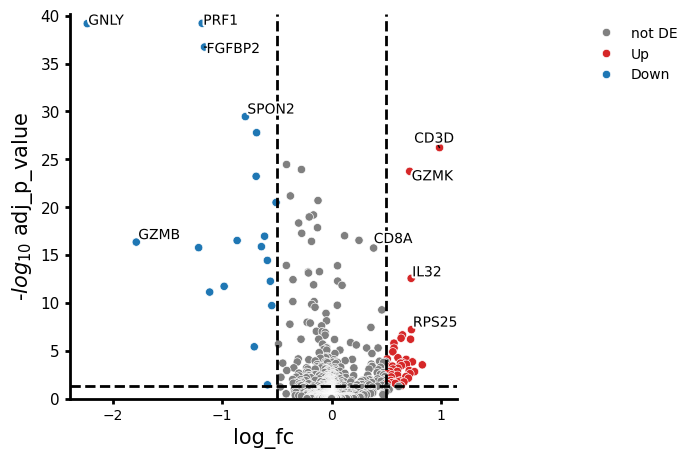

In [12]:
de_res.plot_volcano("CD8_vs_NK", log2fc_thresh=0.5)

Index(['CD8 T cells', 'NK cells'], dtype='object')


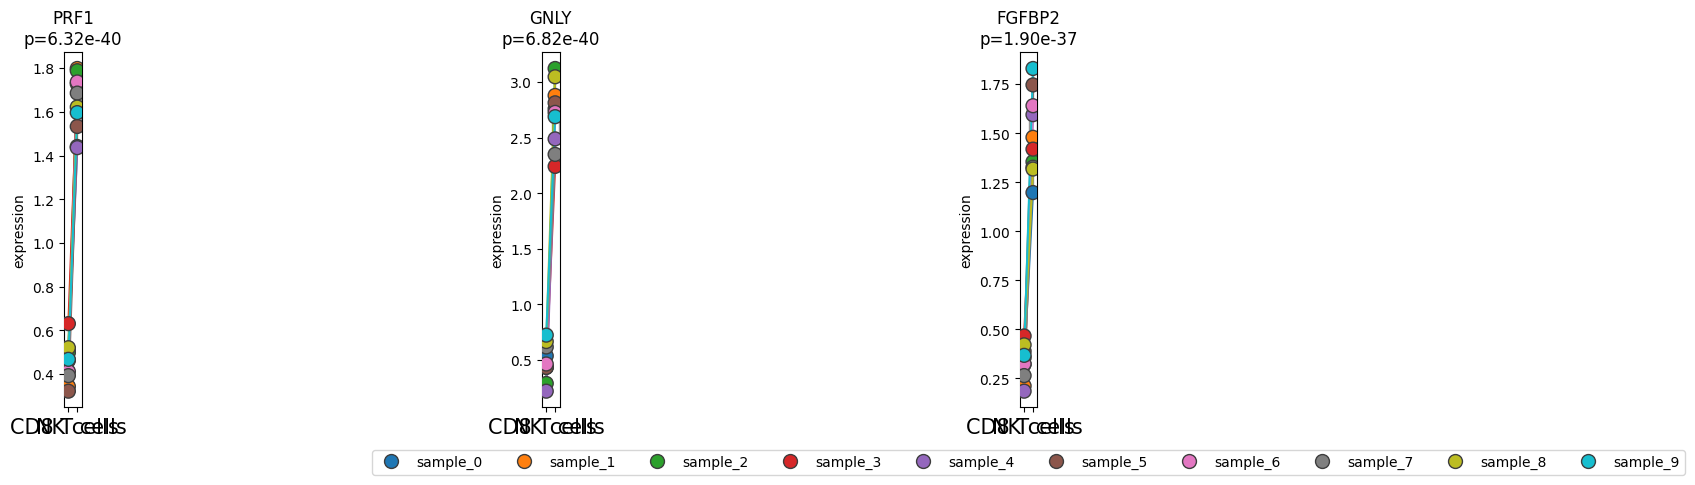

In [13]:
de_res.plot_paired("louvain", "sample", "CD8_vs_NK", groups=["CD8 T cells", "NK cells"], n_top_vars=3)

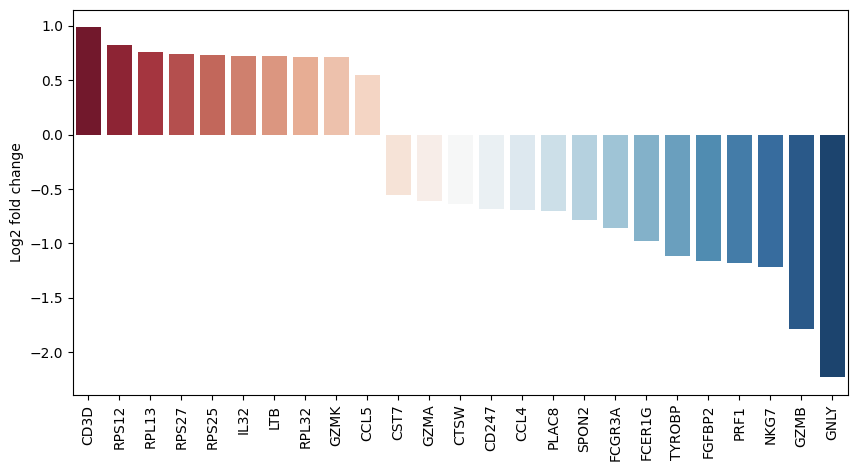

In [14]:
de_res.plot_fold_change("CD8_vs_NK")

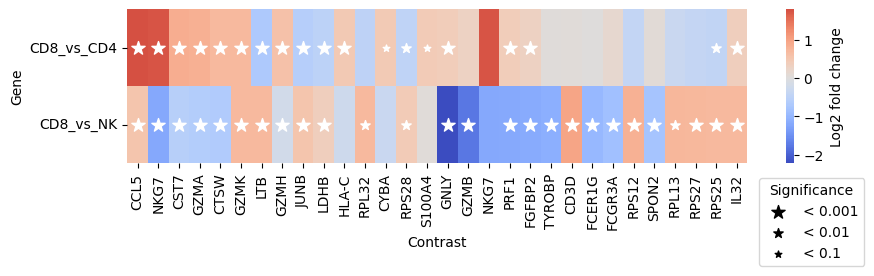

In [15]:
de_res.plot_multicomparison_fc()